In [67]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# looking at the top 100 disease-disease relations in a random set of 500 diseases
N_TOPRELATIONS = 100
N_DISEASE = 500

In [77]:
API='https://alpha.targetvalidation.org/api/1.1/'

def get_token(app_name='load-test',secret='1RT6L519zkcTH9i3F99OjeYn13k79Wep'):
    jwt = requests.get(API + 'public/auth/request_token',
                     params={'app_name':app_name,'secret':secret})
    return jwt.json()['token']

token = get_token()

In [79]:
# extract the score for one disease (eg.asthma)
def get_disease_relation(EFO):
    response = requests.get(API + 'private/relation/disease/' + EFO,
                        params={'size':N_TOPRELATIONS},
                        headers={'Auth-Token': token})
            
    return response.json()['data']

r = get_disease_relation('EFO_0000270')
r

[{'counts': {'shared_count': 2921, 'union_count': 2921},
  'direction': None,
  'id': 'EFO_0000270-EFO_0000270',
  'object': {'id': 'EFO_0000270',
   'label': 'asthma',
   'links': {'targets_count': 2921}},
  'scores': {'cityblock': 1.0,
   'euclidean': 1.0,
   'jaccard': 1.0,
   'jackard_weighted': 0.9999999999999997},
  'shared_targets': ['ENSG00000113580',
   'ENSG00000169252',
   'ENSG00000196639',
   'ENSG00000133019',
   'ENSG00000073756',
   'ENSG00000113448',
   'ENSG00000172057',
   'ENSG00000149451',
   'ENSG00000133048',
   'ENSG00000095303',
   'ENSG00000043591',
   'ENSG00000169245',
   'ENSG00000184588',
   'ENSG00000065989',
   'ENSG00000105650',
   'ENSG00000111424',
   'ENSG00000168229',
   'ENSG00000173198',
   'ENSG00000187258',
   'ENSG00000186009',
   'ENSG00000172572',
   'ENSG00000105675',
   'ENSG00000146070',
   'ENSG00000175497',
   'ENSG00000170214',
   'ENSG00000188778',
   'ENSG00000171873',
   'ENSG00000120907',
   'ENSG00000171195',
   'ENSG00000090376',


In [22]:
def scoresfromjson(r): return pd.DataFrame([x['scores'] for x in r if x['object']['id'] != x['subject']['id']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111404ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1123c4f60>]], dtype=object)

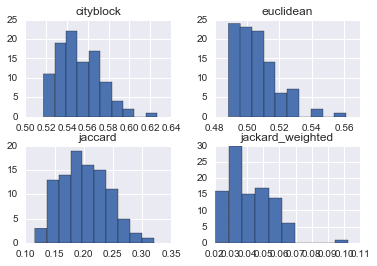

In [30]:
df = scoresfromjson(r)
df.hist()

In [38]:
# get more EFO codes with a hack
efo_codes = []
for t in ['ENSG00000141510','ENSG00000142168','ENSG00000073756','ENSG00000149311']:
    payload = {'target':t, 
                'facets':'false', 
                'size':500, 
                'direct':'true',
                'fields':'disease.id'}
    e = requests.get(API + '/public/association/filter', params= payload)
    efo_codes.extend([x['disease']['id'] for x in e.json()['data']])
    
print(len(efo_codes))
efo_codes_set = set(efo_codes)
print(len(efo_codes_set))

1215
807


In [60]:
# select a random sample of EFO codes to check relationships for
import random

frames = []
for d in random.sample(efo_codes_set,N_DISEASE):
    try:
        frames.append(scoresfromjson(get_disease_relation(d)))
    except:
        continue

print(len(frames))
df = pd.concat(frames)
df.shape
# sample the distribution of the score

500


(49500, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f46da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1160c1f28>]], dtype=object)

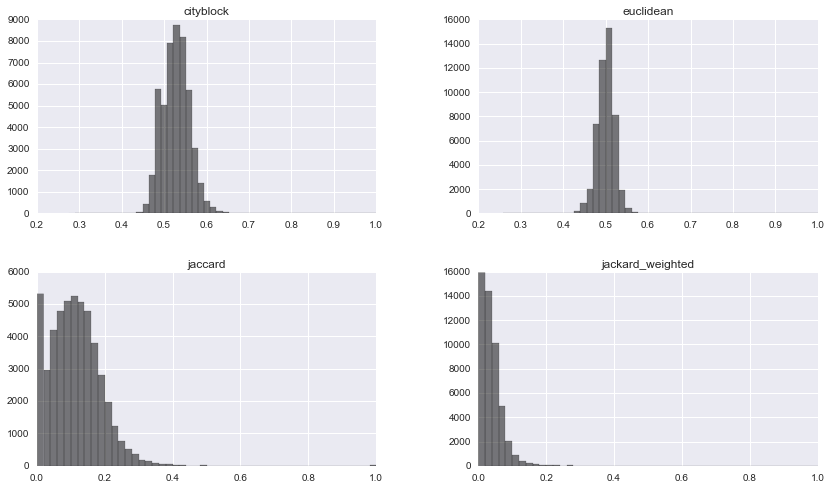

In [73]:
df.hist(color='k', alpha=0.5, bins=50,figsize=(14,8))